<a href="https://colab.research.google.com/github/akmhel/Plate-Number-Classification/blob/master/MLTSK%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!unzip negative_images.zip

Archive:  negative_images.zip
  inflating: negative_images/download (1).jpg  
  inflating: negative_images/download (10).jpg  
  inflating: negative_images/download (100).jpg  
  inflating: negative_images/download (11).jpg  
  inflating: negative_images/download (12).jpg  
  inflating: negative_images/download (13).jpg  
  inflating: negative_images/download (14).jpg  
  inflating: negative_images/download (15).jpg  
  inflating: negative_images/download (16).jpg  
  inflating: negative_images/download (17).jpg  
  inflating: negative_images/download (18).jpg  
  inflating: negative_images/download (19).jpg  
  inflating: negative_images/download (2).jpg  
  inflating: negative_images/download (20).jpg  
  inflating: negative_images/download (21).jpg  
  inflating: negative_images/download (22).jpg  
  inflating: negative_images/download (23).jpg  
  inflating: negative_images/download (24).jpg  
  inflating: negative_images/download (25).jpg  
  inflating: negative_images/download (2

In [4]:
!unzip plate_number.zip

Archive:  plate_number.zip
  inflating: plate_number/AA344-NSR.jpg  
  inflating: plate_number/AA594-NSW.jpg  
  inflating: plate_number/AA689-GGE.jpg  
  inflating: plate_number/AA79-AKK.jpg  
  inflating: plate_number/AAA-378AA.jpeg  
  inflating: plate_number/ABC-323AG.jpg  
  inflating: plate_number/ABC-499MJ.jpg  
  inflating: plate_number/ABC-87SJ.jpg  
  inflating: plate_number/ABJ-669NS.jpg  
  inflating: plate_number/ACH-538AA.jpg  
  inflating: plate_number/AE164-SKK.jpg  
  inflating: plate_number/AE192-KPU.jpg  
  inflating: plate_number/AFR-584AA.jpg  
  inflating: plate_number/AG887-MKR.jpeg  
  inflating: plate_number/AJ440-BDG.jpg  
  inflating: plate_number/AP241-YEN.jpg  
  inflating: plate_number/APP-242XE.jpg  
  inflating: plate_number/APP-456CV.jpeg  
  inflating: plate_number/AR887-SMK.jpg  
  inflating: plate_number/AU-73671.jpg  
  inflating: plate_number/AZM-9590.jpg  
  inflating: plate_number/B-21728.jpg  
  inflating: plate_number/BCC-38933.jpg  
  inflatin

X.shape is (12288, 200)
Proceed 0 of 200


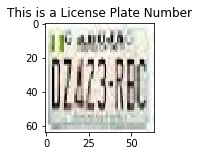

In [17]:
import os, cv2, itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

TRAIN_DIR = './plate_number/'
TEST_DIR = './negative_images/'
ROWS = 64
COLS = 64
CHANNELS = 3

train_images = [TRAIN_DIR + i for i in os.listdir(TRAIN_DIR)]
test_images = [TEST_DIR + i for i in os.listdir(TEST_DIR)]

def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    return cv2.resize(img, (ROWS, COLS),interpolation = cv2.INTER_CUBIC)

def prep_data(images):
    u = len(images)
    v_z = ROWS*COLS*CHANNELS

    X = np.ndarray((v_z,u), dtype=np.uint8)
    y = np.zeros((1,u))
    print("X.shape is {}".format(X.shape))

    for i,image_file in enumerate(images):
        image = read_image(image_file)
        X[:,i] = np.squeeze(image.reshape((v_z,1)))
        if '-' in image_file.lower():
            y[0,i] = 1
        elif 'download' in image_file.lower():
            y[0,i] = 0
        else :
            y[0,i] = image_file.split('/')[-1].split('.')[0]

        if i%5000 == 0:
            print("Proceed {} of {}".format(i, u))

    return X,y

X_img, y_img = prep_data(train_images + test_images)

classes = {0: 'Normal Image',
            1: 'License Plate Number'}

def show_images(X, y, idx) :
    image = X[idx]
    image = image.reshape((ROWS, COLS, CHANNELS))
    plt.figure(figsize=(4,2))
    plt.imshow(image)
    plt.title("This is a {}".format(classes[y[idx,0]]))
    plt.show()

show_images(X_train.T, y_train.T, 67)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Model accuracy: 100.00%


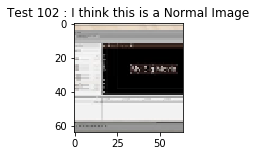

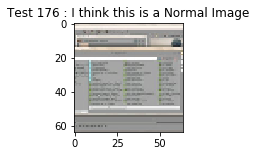

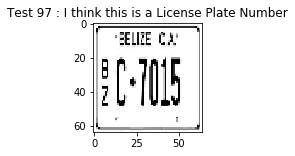

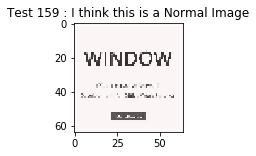

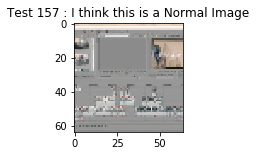

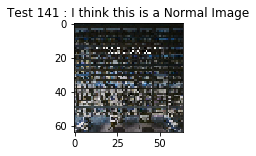

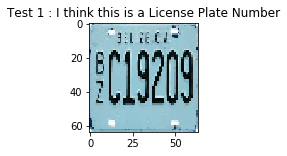

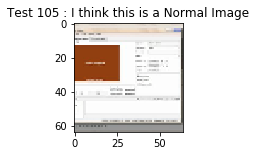

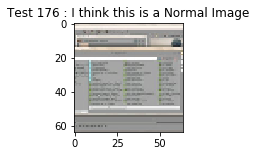

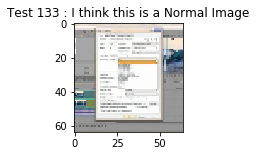

In [19]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV()

X_img_lr, y_img_lr = X_img.T, y_img.T.ravel()

clf.fit(X_img_lr,y_img_lr)

print("Model accuracy: {:.2f}%".format(clf.score(X_img_lr, y_img_lr)*100))

def show_image_prediction(X, idx, model):
  image = X[idx].reshape(1,-1)
  image_class = classes[model.predict(image).item()]
  image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize = (4,2))
  plt.imshow(image)
  plt.title("Test {} : I think this is a {}".format(idx, image_class))
  plt.show()
  
X_img_lr, y_img_lr = X_img.T, y_img.T

for i in np.random.randint(0, len(X_img_lr), 10):
  show_image_prediction(X_img_lr, i, clf)